# Import Libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

# Importing data sets

In [2]:
rawHisTransDF=pd.read_csv('Historical-transaction-data.csv')
rawStoreInfDF=pd.read_csv('Store-info.csv')
rawTestDF=pd.read_csv('Testing-data.csv')

# Viewing data frame

In [3]:
rawHisTransDF.head()

,item_description,transaction_date,invoice_id,customer_id,shop_id,item_price,quantity_sold
0,ORANGE BARLEY 1.5L,2021-12-11T00:00:00.000Z,147.0,BGXA,SHOP008,220,2
1,GINGER BEER 1.5L,2021-10-17T00:00:00.000Z,371.0,IA25,SHOP112,220,2
2,TONIC PET 500ML,2021-12-13T00:00:00.000Z,484.0,VN7V,SHOP008,160,2
3,CREAM SODA 1L,2021-12-13T00:00:00.000Z,484.0,VN7V,SHOP008,150,2
4,STRAWBERRY MILK 180ML,2021-10-23T00:00:00.000Z,1310.0,7S00,SHOP112,210,5


In [4]:
rawStoreInfDF.head()

,shop_id,shop_area_sq_ft,shop_profile
0,SHOP047,528,Moderate
1,SHOP009,676,High
2,SHOP083,676,Low
3,SHOP117,676,Low
4,SHOP042,676,Low


# Data Pre processing

#### Fixing data

In [5]:
# convert the date string column to datetime
rawHisTransDF['transaction_date'] = pd.to_datetime(rawHisTransDF['transaction_date'], format='%Y/%m/%d').dt.date

In [6]:
# get count of null values in each column
null_counts = rawHisTransDF.isnull().sum()
# print the counts
print(null_counts)

item_description    35928
transaction_date        0
invoice_id           6320
customer_id             0
shop_id                 0
item_price              0
quantity_sold           0
dtype: int64


In [7]:
rawHisTransDF.dropna(subset=['item_description','invoice_id'], inplace=True)

In [8]:
# get count of null values in each column
null_counts = rawHisTransDF.isnull().sum()
# print the counts
print(null_counts)

item_description    0
transaction_date    0
invoice_id          0
customer_id         0
shop_id             0
item_price          0
quantity_sold       0
dtype: int64


In [9]:
rawHisTransDF=rawHisTransDF.drop_duplicates()

# Encoding

In [10]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
rawHisTransDF['item_description'] = le.fit_transform(rawHisTransDF['item_description'])
rawHisTransDF['customer_id'] = le.fit_transform(rawHisTransDF['customer_id'])
rawHisTransDF['shop_id'] = rawHisTransDF['shop_id'].str.replace(r'^SHOP', '').astype(int)
rawStoreInfDF['shop_id'] = rawStoreInfDF['shop_id'].str.replace(r'^SHOP', '').astype(int)

C:\Users\DELL\AppData\Local\Temp\ipykernel_3288\1857105866.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  rawHisTransDF['shop_id'] = rawHisTransDF['shop_id'].str.replace(r'^SHOP', '').astype(int)
C:\Users\DELL\AppData\Local\Temp\ipykernel_3288\1857105866.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  rawStoreInfDF['shop_id'] = rawStoreInfDF['shop_id'].str.replace(r'^SHOP', '').astype(int)


In [11]:
rawStoreInfDF['shop_profile'] = rawStoreInfDF['shop_profile'].replace({'High': 1, 'Moderate': 2, 'Low': 3})
rawStoreInfDF['shop_profile'] = rawStoreInfDF['shop_profile'].fillna(0.0).astype(int)
rawHisTransDF['invoice_id'] = rawHisTransDF['invoice_id'].astype(int)

In [12]:
rawStoreInfDF

,shop_id,shop_area_sq_ft,shop_profile
0,47,528,2
1,9,676,1
2,83,676,3
3,117,676,3
4,42,676,3
...,...,...,...
119,87,527,0
120,50,411,0
121,61,699,0
122,56,597,0


In [13]:
rawHisTransDF

,item_description,transaction_date,invoice_id,customer_id,shop_id,item_price,quantity_sold
0,27,2021-12-11,147,57272,8,220,2
1,14,2021-10-17,371,91334,112,220,2
2,35,2021-12-13,484,158179,8,160,2
3,4,2021-12-13,484,158179,8,150,2
4,34,2021-10-23,1310,38862,112,210,5
...,...,...,...,...,...,...,...
473820,13,2021-11-14,8014206,176899,3,60,2
473821,1,2021-10-16,8304754,52159,127,35,2
473822,14,2021-10-16,8304807,95280,127,220,1
473823,1,2021-11-07,8313570,8748,127,35,1


# Feature Creation

In [14]:
# group the dataframe by the 'group' column and get the size of each group
transactions_by_shop = rawHisTransDF.groupby('shop_id').size().reset_index()

# rename columns of the new dataframe
transactions_by_shop.columns = ['shop_id', 'num_of_transactions']

In [15]:
# rawStoreInfDF['transaction_by_shop']=transactions_by_shop
rawStoreInfDF = pd.merge(rawStoreInfDF, transactions_by_shop, on='shop_id')
rawStoreInfDF

,shop_id,shop_area_sq_ft,shop_profile,num_of_transactions
0,47,528,2,1396
1,9,676,1,3688
2,83,676,3,2981
3,117,676,3,3544
4,42,676,3,2683
...,...,...,...,...
119,87,527,0,1713
120,50,411,0,3554
121,61,699,0,2761
122,56,597,0,4846


In [16]:
# get count of null values in each column
null_counts = rawStoreInfDF.isnull().sum()
# print the counts
print(null_counts)

shop_id                0
shop_area_sq_ft        0
shop_profile           0
num_of_transactions    0
dtype: int64


In [17]:
output=pd.read_csv('output.csv')

In [18]:
output = output[['shop_id', 'Daily_Sales_avg', 'revnew', 'rev_per_sqfeet', 'avd_daily_items_types_sold', 'avd_daily_transctions', 'avd_daily_custemers', 'avg_visits']]

In [19]:
output =output.drop_duplicates()

In [20]:
# rawStoreInfDF['transaction_by_shop']=transactions_by_shop
rawStoreInfDF = pd.merge(rawStoreInfDF, output, on='shop_id')
rawStoreInfDF

,shop_id,shop_area_sq_ft,shop_profile,num_of_transactions,Daily_Sales_avg,revnew,rev_per_sqfeet,avd_daily_items_types_sold,avd_daily_transctions,avd_daily_custemers,avg_visits
0,47,528,2,1396,12942.461651,697510,1321,12,19,18,164
1,9,676,1,3688,30764.239580,1605555,2375,21,49,49,166
2,83,676,3,2981,27360.354452,1476445,2184,19,39,39,172
3,117,676,3,3544,38445.995702,2033385,3008,20,47,47,186
4,42,676,3,2683,21678.661223,1133820,1677,18,36,36,160
...,...,...,...,...,...,...,...,...,...,...,...
119,87,527,0,1713,20176.512253,1048015,1989,13,22,22,168
120,50,411,0,3554,42217.525685,2133300,5191,18,48,48,208
121,61,699,0,2761,44238.682756,1983470,2838,17,36,35,166
122,56,597,0,4846,46307.680336,2494620,4179,24,64,64,182


In [21]:
rawStoreInfDF=rawStoreInfDF.drop(['avd_daily_transctions','revnew','avd_daily_custemers','num_of_transactions'], axis=1)

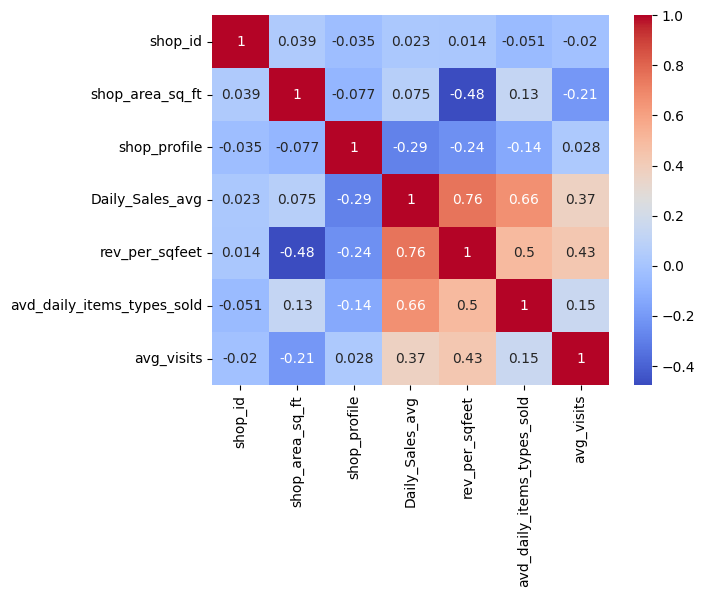

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# load your data into a pandas dataframe
# df = pd.read_csv('your_data.csv')

# compute the correlation matrix
corr_matrix = rawStoreInfDF.corr()

# plot the correlation matrix as a heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()


# Split to train and test data

In [23]:
# Split the DataFrame into two based on column B
TestDF = rawStoreInfDF[rawStoreInfDF['shop_profile'] == 0].drop(['shop_profile'], axis=1)
TrainDF = rawStoreInfDF[rawStoreInfDF['shop_profile'] != 0]

In [24]:
# Split Fulldata into training and testing sets
from sklearn.model_selection import train_test_split

column_name = 'shop_id'
unique_categories = TrainDF[column_name].nunique()
categories_in_dataset_1 = int(unique_categories * 0.8)
categories_in_dataset_2 = unique_categories - categories_in_dataset_1
dataset_1_categories = TrainDF[column_name].unique()[:categories_in_dataset_1]
dataset_2_categories = TrainDF[column_name].unique()[categories_in_dataset_1:]

train_data = TrainDF[TrainDF[column_name].isin(dataset_1_categories)]
test_data = TrainDF[TrainDF[column_name].isin(dataset_2_categories)]





#train_data, test_data = train_test_split(TrainDF, test_size=0.01)

In [25]:
train_data

,shop_id,shop_area_sq_ft,shop_profile,Daily_Sales_avg,rev_per_sqfeet,avd_daily_items_types_sold,avg_visits
0,47,528,2,12942.461651,1321,12,164
1,9,676,1,30764.239580,2375,21,166
2,83,676,3,27360.354452,2184,19,172
3,117,676,3,38445.995702,3008,20,186
4,42,676,3,21678.661223,1677,18,160
...,...,...,...,...,...,...,...
75,82,549,1,43197.781870,4233,24,178
76,111,617,1,57321.175039,5099,24,186
77,72,617,1,41364.617086,3907,22,157
78,78,422,2,46013.798260,5422,21,188


In [26]:
expectedResult=test_data[['shop_id','shop_profile']]


In [27]:
expectedResult

,shop_id,shop_profile
80,94,3
81,18,1
82,122,2
83,17,1
84,45,1
85,7,3
86,119,2
87,1,3
88,54,1
89,102,3


In [28]:
# # group the dataframe by the 'group' column
# grouped = expectedResult.groupby('shop_id')

# # find the mode value of each group
# TestMode_df = grouped['shop_profile'].apply(lambda x: x.mode()[0]).reset_index()

# # rename columns of the new dataframe
# TestMode_df.columns = ['shop_id', 'shop_profile']

In [29]:
# TestMode_df['shop_id']=TestMode_df['shop_id'].astype(int)
# TestMode_df['shop_profile']=TestMode_df['shop_profile'].astype(int)

In [30]:
shop_id_x_test = test_data['shop_id']
train_data=train_data.drop('shop_id', axis=1)
test_data=test_data.drop('shop_id',axis=1)

In [31]:
X_train=train_data.drop(['shop_profile'], axis=1)
y_train=train_data['shop_profile']
X_test= test_data.drop(['shop_profile'], axis=1)
y_test=test_data['shop_profile']
X_testres = X_test.reset_index(drop=True)

In [32]:
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

# Define the logistic regression model
model = RandomForestClassifier(max_depth=25, min_samples_leaf=1, min_samples_split=2, n_estimators=10)

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
predictions = model.predict(X_test)

accu = accuracy_score(y_test, predictions)

print(accu)
# print(f1_score(y_test, predictions, average=None))



0.55


In [33]:
predDf=pd.DataFrame(predictions, columns=['shop_profile'])

In [34]:
predDf

,shop_profile
0,1
1,1
2,3
3,3
4,1
5,3
6,2
7,2
8,1
9,3


In [35]:
shop_id_x_test

80     94
81     18
82    122
83     17
84     45
85      7
86    119
87      1
88     54
89    102
90    115
91     79
92     49
93    121
94     10
95    124
96     12
97     93
98      4
99    101
Name: shop_id, dtype: int32

In [36]:
shop_id_x_test=shop_id_x_test.reset_index()

In [37]:
shop_id_x_test=shop_id_x_test.drop('index',axis=1)

In [38]:
# Concatenate DataFrames
concatenatedRes_df = pd.concat([shop_id_x_test, predDf], axis=1)
# concatenatedRes_df = pd.concat([concatenatedRes_df, shop_id_x_test], axis=1)
# concatenated_df = pd.concat([shop_id_x_test, predDf], ignore_index=True)

In [39]:
concatenatedRes_df

,shop_id,shop_profile
0,94,1
1,18,1
2,122,3
3,17,3
4,45,1
5,7,3
6,119,2
7,1,2
8,54,1
9,102,3


In [40]:
# # group the dataframe by the 'group' column
# grouped = concatenatedRes_df.groupby('shop_id')

# # find the mode value of each group
# result = grouped['shop_profile'].apply(lambda x: x.mode()[0]).reset_index()

# # rename columns of the new dataframe
# result.columns = ['shop_id', 'shop_profile']

In [41]:
# result['shop_id']=result['shop_id'].astype(int)
# result['shop_profile']=result['shop_profile'].astype(int)
# result=result['shop_profile']

In [42]:
expectedResult

,shop_id,shop_profile
80,94,3
81,18,1
82,122,2
83,17,1
84,45,1
85,7,3
86,119,2
87,1,3
88,54,1
89,102,3


In [43]:
concatenatedRes_df

,shop_id,shop_profile
0,94,1
1,18,1
2,122,3
3,17,3
4,45,1
5,7,3
6,119,2
7,1,2
8,54,1
9,102,3


In [44]:
expectedResult=expectedResult['shop_profile']
concatenatedRes_df=concatenatedRes_df['shop_profile']

In [45]:
# Calculate F1 score for each class
f1_class0 = f1_score(expectedResult, concatenatedRes_df, labels=[1], average='weighted')
f1_class1 = f1_score(expectedResult, concatenatedRes_df, labels=[2], average='weighted')
f1_class2 = f1_score(expectedResult, concatenatedRes_df, labels=[3], average='weighted')

# Calculate average F1 score
f1_average = (f1_class0 + f1_class1 + f1_class2) / 3

print(f"F1 score for class 0: {f1_class0:.2f}")
print(f"F1 score for class 1: {f1_class1:.2f}")
print(f"F1 score for class 2: {f1_class2:.2f}")
print(f"Average F1 score: {f1_average:.2f}")

F1 score for class 0: 0.67
F1 score for class 1: 0.55
F1 score for class 2: 0.43
Average F1 score: 0.55


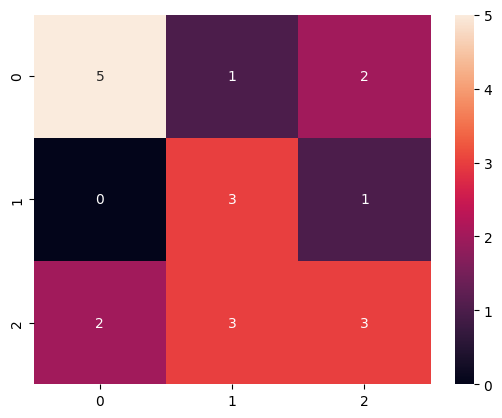

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Create confusion matrix
matrix = confusion_matrix(expectedResult, concatenatedRes_df)

# Visualize confusion matrix
sns.heatmap(matrix, annot=True)
plt.show()

In [47]:
y_train = y_train.replace({1: 0, 2: 1, 3: 2})
y_test = y_test.replace({1: 0, 2: 1, 3: 2})

In [48]:
import xgboost as xgb

# define the XGBoost model
model = xgb.XGBClassifier(objective='binary:logistic', random_state=42)

# train the model on the training data
model.fit(X_train, y_train)

# make predictions on the testing data
y_pred = model.predict(X_test)

# calculate the accuracy score of the predictions
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 50.00%


In [49]:
predDf_xg=pd.DataFrame(y_pred, columns=['shop_profile'])

In [50]:
# Concatenate DataFrames
concatenatedRes_df_xg = pd.concat([shop_id_x_test, predDf_xg], axis=1)
# concatenatedRes_df = pd.concat([concatenatedRes_df, shop_id_x_test], axis=1)
# concatenated_df = pd.concat([shop_id_x_test, predDf], ignore_index=True)

In [51]:
concatenatedRes_df_xg

,shop_id,shop_profile
0,94,0
1,18,0
2,122,1
3,17,2
4,45,0
5,7,2
6,119,1
7,1,1
8,54,0
9,102,2


In [52]:
# expectedResult=expectedResult['shop_profile']
concatenatedRes_df_xg=concatenatedRes_df_xg['shop_profile']

In [53]:
y_train = y_train.replace({0: 1, 1: 2, 2: 3})
y_test = y_test.replace({0: 1, 1: 2, 2: 3})

In [54]:
# Calculate F1 score for each class
f1_class0 = f1_score(expectedResult, concatenatedRes_df_xg, labels=[1], average='weighted')
f1_class1 = f1_score(expectedResult, concatenatedRes_df_xg, labels=[2], average='weighted')
f1_class2 = f1_score(expectedResult, concatenatedRes_df_xg, labels=[3], average='weighted')

# Calculate average F1 score
f1_average = (f1_class0 + f1_class1 + f1_class2) / 3

print(f"F1 score for class 0: {f1_class0:.2f}")
print(f"F1 score for class 1: {f1_class1:.2f}")
print(f"F1 score for class 2: {f1_class2:.2f}")
print(f"Average F1 score: {f1_average:.2f}")

F1 score for class 0: 0.12
F1 score for class 1: 0.22
F1 score for class 2: 0.00
Average F1 score: 0.12


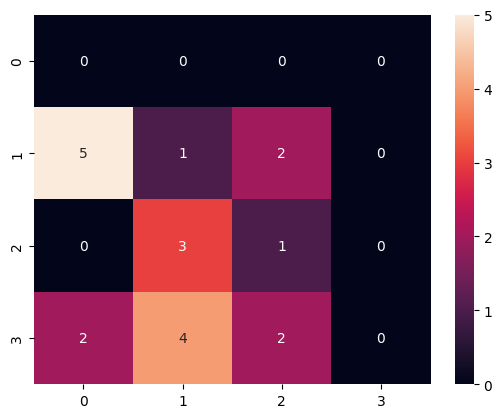

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Create confusion matrix
matrix = confusion_matrix(expectedResult, concatenatedRes_df_xg)

# Visualize confusion matrix
sns.heatmap(matrix, annot=True)
plt.show()